In [1]:
import pandas as pd
import plotly
def get_compdata(year1,year2,columns):
    base_1=f'https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/{year1}_team_totals.csv'
    base_2=f'https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/{year2}_team_totals.csv'

    df = pd.read_csv(base_1,usecols=columns)
    df['year']=year1
    df2=pd.read_csv(base_2,usecols=columns)
    df2['year']=year2
    return pd.concat([df,df2])

start_year=2024
end_year=2025



    POTENTIAL_AST_2025 Team
0            40.130862  LAC
1            40.627724  PHI
2            41.322530  DAL
3            42.222222  NOP
4            43.199339  MIN
5            43.371212  HOU
6            44.768665  DET
7            45.036715  POR
8            45.403377  NYK
9            45.575094  CHA
10           45.789474  OKC
11           45.908460  WAS
12           46.188851  MIL
13           46.363132  UTA
14           46.465696  IND
15           47.070367  LAL
16           47.534834  CLE
17           48.232323  MIA
18           48.458032  SAC
19           48.633880  BOS
20           49.015208  MEM
21           49.068668  BKN
22           49.152093  ORL
23           49.283909  PHX
24           49.675851  DEN
25           49.690243  CHI
26           51.040361  ATL
27           52.002080  TOR
28           53.038077  SAS
29           54.001617  GSW


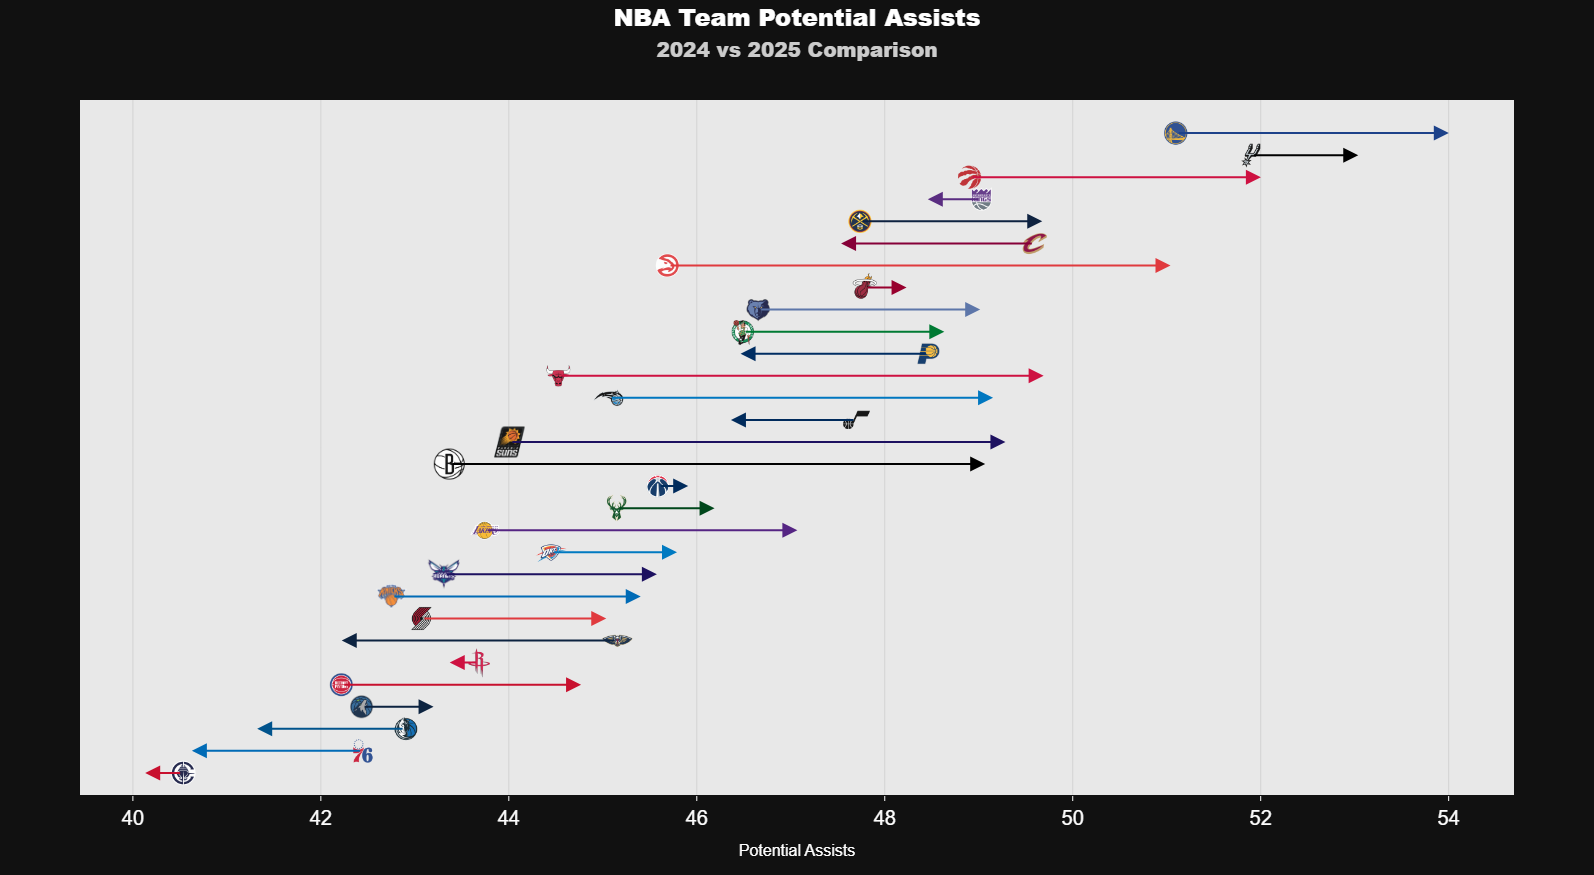

In [2]:
import plotly.graph_objects as go
import pandas as pd
import cairosvg
import base64
# NBA team colors dictionary

def compare_team_performance(metric_column,start_year,end_year, remap,year_column='year', logo_size=1.1):
    columns = ['TeamAbbreviation', 'year', 'POSS',metric_column]

    data= get_compdata(start_year,end_year,columns)

    nba_team_logos ={'ATL': 'nba_team_logos/atl.svg', 'BOS': 'nba_team_logos/bos.svg', 'BKN': 'nba_team_logos/bkn.svg', 'CHA': 'nba_team_logos/cha.svg', 'CHI': 'nba_team_logos/chi.svg', 'CLE': 'nba_team_logos/cle.svg', 'DAL': 'nba_team_logos/dal.svg', 'DEN': 'nba_team_logos/den.svg', 'DET': 'nba_team_logos/det.svg', 'GSW': 'nba_team_logos/gsw.svg', 'HOU': 'nba_team_logos/hou.svg', 'IND': 'nba_team_logos/ind.svg', 'LAC': 'nba_team_logos/lac.svg', 'LAL': 'nba_team_logos/lal.svg', 'MEM': 'nba_team_logos/mem.svg', 'MIA': 'nba_team_logos/mia.svg', 'MIL': 'nba_team_logos/mil.svg', 'MIN': 'nba_team_logos/min.svg', 'NOP': 'nba_team_logos/nop.svg', 'NYK': 'nba_team_logos/nyk.svg', 'OKC': 'nba_team_logos/okc.svg', 'ORL': 'nba_team_logos/orl.svg', 'PHI': 'nba_team_logos/phi.svg', 'PHX': 'nba_team_logos/phx.svg', 'POR': 'nba_team_logos/por.svg', 'SAC': 'nba_team_logos/sac.svg', 'SAS': 'nba_team_logos/sas.svg', 'TOR': 'nba_team_logos/tor.svg', 'UTA': 'nba_team_logos/uta.svg', 'WAS': 'nba_team_logos/was.svg'}

    team_secondary_colors = {
    'ATL': '#E03A3E', 'BOS': '#007A33', 'BKN': '#000000', 'CHA': '#1D1160',
    'CHI': '#CE1141', 'CLE': '#860038', 'DAL': '#00538C', 'DEN': '#0E2240',
    'DET': '#C8102E', 'GSW': '#1D428A', 'HOU': '#CE1141', 'IND': '#002D62',
    'LAC': '#C8102E', 'LAL': '#552583', 'MEM': '#5D76A9', 'MIA': '#98002E',
    'MIL': '#00471B', 'MIN': '#0C2340', 'NOP': '#0C2340', 'NYK': '#006BB6',
    'OKC': '#007AC1', 'ORL': '#0077C0', 'PHI': '#006BB6', 'PHX': '#1D1160',
    'POR': '#E03A3E', 'SAC': '#5A2D81', 'SAS': '#000000', 'TOR': '#CE1141',
    'UTA': '#002B5C', 'WAS': '#002B5C'}


    # NBA team secondary colors
    team_colors = {
        'ATL': '#C1D32F', 'BOS': '#BA9653', 'BKN': '#FFFFFF', 'CHA': '#00788C',
        'CHI': '#000000', 'CLE': '#041E42', 'DAL': '#002B5E', 'DEN': '#FEC524',
        'DET': '#1D42BA', 'GSW': '#FFC72C', 'HOU': '#000000', 'IND': '#FDBB30',
        'LAC': '#1D428A', 'LAL': '#FDB927', 'MEM': '#12173F', 'MIA': '#F9A01B',
        'MIL': '#EEE1C6', 'MIN': '#236192', 'NOP': '#C8102E', 'NYK': '#F58426',
        'OKC': '#EF3B24', 'ORL': '#C4CED4', 'PHI': '#ED174C', 'PHX': '#E56020',
        'POR': '#000000', 'SAC': '#63727A', 'SAS': '#C4CED4', 'TOR': '#000000',
        'UTA': '#00471B', 'WAS': '#E31837'
    }

    if 'TeamAbbreviation' in data.columns:
        df = data.reset_index()
        df['Team'] = df['TeamAbbreviation']
    
    # Get unique years and sort them
    years = sorted(df[year_column].unique())
 
    if len(years) != 2:
        raise ValueError("DataFrame must contain exactly two different years")
    
    year1, year2 = years
 
    for keyword in ['freq', 'accur', 'pct', '%']:
        if keyword in metric_column.lower():
            df[metric_column]=df[metric_column]*100
            perposs= False
            
    if 'rating' not in metric_column.lower():
        df[metric_column]=100*df[metric_column]/df['POSS']
    # Create separate dataframes for each year
    df1 = df[df[year_column] == year1].copy()
    df2 = df[df[year_column] == year2].copy()

    
    # Merge the dataframes
    merged_df = pd.merge(
        df1[['Team', metric_column]],
        df2[['Team', metric_column]],
        on='Team',
        suffixes=(f'_{year1}', f'_{year2}')
    )
    
    # Sort by second year performance
# Sort by second year performance (descending order)
    merged_df = merged_df.sort_values(f'{metric_column}_{year2}', ascending=True)
    merged_df = merged_df.reset_index(drop=True)  # Reset index for proper logo placement
    print(merged_df[[f'{metric_column}_{year2}','Team']])
    # Create the figure
    fig = go.Figure()
    team_colors_list = [team_colors.get(team, '#1D428A') for team in merged_df['Team']]
    fig.add_trace(go.Bar(
        name=str(year2),
        y=merged_df['Team'],
        x=merged_df[f'{metric_column}_{year2}'],
        orientation='h',
        marker_color=team_colors_list,
        marker_line_color='rgba(255, 255, 255, 0.5)',
        marker_line_width=1.5,
        opacity=0,  # Makes the bars invisible
        showlegend=False,
        hoverinfo="none"
    ))
    
    # Add bars for both years
    fig.add_trace(go.Bar(
        name=str(year1),
        y=merged_df['Team'],
        x=merged_df[f'{metric_column}_{year1}'],
        orientation='h',
        marker_color='rgba(128, 128, 128, 0.7)',
        marker_line_color='rgba(128, 128, 128, 1)',
        marker_line_width=1,
        opacity=0,
        visible='legendonly',
        showlegend=False
    ))
    
    # Add bars for second year with team-specific colors

    
    if nba_team_logos:
        x_min = merged_df[f'{metric_column}_{year1}'].min()
        x_range = merged_df[f'{metric_column}_{year2}'].max() - x_min

        for idx, row in merged_df.iterrows():
            team_abbr = row['Team']
            logo_url = nba_team_logos.get(team_abbr)

            # Extract data for hover info
            year1_value = row[f'{metric_column}_{year1}']
            year2_value = row[f'{metric_column}_{year2}']

            difference = year2_value - year1_value

            # Create hover info
            hover_info = (
                f"Team: {team_abbr}<br>"
                f"{year1}: {year1_value:.2f} <br>"
                f"{year2}: {year2_value:.2f} <br>"
                f"Difference: {difference:.2f}"
            )

            if logo_url:
                try:
                    # Convert the SVG logo to PNG and encode it
                    logo_svg = cairosvg.svg2png(url=logo_url)
                    encoded_image = base64.b64encode(logo_svg).decode()

                    # Add the logo as an image
                    fig.add_layout_image(
                        dict(
                            source="data:image/png;base64," + encoded_image,
                            x=row[f'{metric_column}_{year1}'],
                            y=row['Team'],  # Use team name directly for y position
                            xref="x",
                            yref="y",
                            sizex=x_range * logo_size,
                            sizey=1.4,
                            xanchor="center",
                            yanchor="middle",
                            opacity=0.9,
                            layer="below"
                        )
                    )

                    # Add an invisible scatter point for hover info
                    fig.add_trace(go.Scatter(
                        x=[row[f'{metric_column}_{year1}']],
                        y=[row['Team']],
                        mode='markers',
                        showlegend=False,
                        marker=dict(size=0, opacity=0),
                        hoverinfo='text',
                        text=[hover_info]
                    ))
                except Exception as e:
                    print(f"Error adding logo for {team_abbr}: {str(e)}")



    for idx, row in merged_df.iterrows():
        team = row['Team']
        primary_color = team_colors.get(team, '#1D428A')
        secondary_color = team_secondary_colors.get(team, '#FFFFFF')
        

        fig.add_annotation(
            y=row['Team'],
            x=row[f'{metric_column}_{year2}'],
            xref="x",
            yref="y",
            axref="x",
            ayref="y",
            ax=row[f'{metric_column}_{year1}'],
            ay=row['Team'],
            arrowhead=2,
            arrowsize=1.5,
            arrowwidth=2,
            arrowcolor=secondary_color,
            opacity=1,
            standoff=0,
            startstandoff=0
        )
            
    # Create a more stylized title
    title_text = f'NBA Team {remap[metric_column]}<br>'
    title_text += f'<span style="font-size: 20px; color: #CCCCCC">{year1} vs {year2} Comparison</span>'
    
    # Update layout with enhanced styling

    
    # Update axes styling
    # Get global min and max from both years
    global_min = min(merged_df[f'{metric_column}_{year1}'].min(), 
                     merged_df[f'{metric_column}_{year2}'].min())
    global_max = max(merged_df[f'{metric_column}_{year1}'].max(), 
                     merged_df[f'{metric_column}_{year2}'].max())
    
    # Add some padding (e.g., 5% on each side)
    padding = (global_max - global_min) * 0.05
    axis_min = global_min - padding
    axis_max = global_max + padding
    
    fig.update_xaxes(
        showgrid=True,
        gridwidth=1,
        ticks="outside",
        gridcolor='rgba(128, 128, 128, 0.2)',

        tickfont=dict(
        size=20 ),

        zeroline=False,
        zerolinecolor='rgba(255, 255, 255, 0.5)',
        zerolinewidth=1,
        color='white',
       
        range=[axis_min, axis_max]  # Set the axis range
    )
        # Calculate y-axis range padding
    num_teams = len(merged_df['Team'])
    y_padding = 1  # Adjust this value to control the amount of space added
    
    # Set the range with padding
    y_axis_min = -y_padding
    y_axis_max = num_teams + y_padding-.5

            
    fig.update_yaxes(
        showgrid=False,
        showticklabels=False,
        color='white',
        range=[y_axis_min, y_axis_max]  # Extend the y-axis range
    )
    fig.update_layout(
        title={
            'text': title_text,
            'font': {'size': 24, 'color': 'white', 'family': 'Arial Black'},
            'y': 0.97,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        barmode='overlay',
        width = 1225,
        height = 875,
        showlegend=True,
        yaxis={'categoryorder': 'total ascending'},
        xaxis_title={
            'text': remap[metric_column],
            'font': {'size': 16, 'color': 'white'}
        },
        yaxis_title='',  # Remove y-axis title since we have team logos
        plot_bgcolor='#e8e8e8',
        paper_bgcolor='rgb(17, 17, 17)',
    
        font=dict(color='white', family='Arial'),
        legend=dict(
            bgcolor='rgba(0,0,0,0.5)',
            bordercolor='white',
            borderwidth=1,
            font=dict(size=12)
        )
    )
    fig.update_layout(
        xaxis=dict(
            constrain='domain'  # This helps prevent arrow extension
        ),
        yaxis=dict(
            constrain='domain'
        )
    )
    return fig
# Example usage:


def team_graph_scatter(column1, column2, year, ps=False, mpg=10, gp=1, selected_rate='Per 100', team=None, team_list=[], remap={}):

    nba_team_logos ={'ATL': 'nba_team_logos/atl.svg', 'BOS': 'nba_team_logos/bos.svg', 'BKN': 'nba_team_logos/bkn.svg', 'CHA': 'nba_team_logos/cha.svg', 'CHI': 'nba_team_logos/chi.svg', 'CLE': 'nba_team_logos/cle.svg', 'DAL': 'nba_team_logos/dal.svg', 'DEN': 'nba_team_logos/den.svg', 'DET': 'nba_team_logos/det.svg', 'GSW': 'nba_team_logos/gsw.svg', 'HOU': 'nba_team_logos/hou.svg', 'IND': 'nba_team_logos/ind.svg', 'LAC': 'nba_team_logos/lac.svg', 'LAL': 'nba_team_logos/lal.svg', 'MEM': 'nba_team_logos/mem.svg', 'MIA': 'nba_team_logos/mia.svg', 'MIL': 'nba_team_logos/mil.svg', 'MIN': 'nba_team_logos/min.svg', 'NOP': 'nba_team_logos/nop.svg', 'NYK': 'nba_team_logos/nyk.svg', 'OKC': 'nba_team_logos/okc.svg', 'ORL': 'nba_team_logos/orl.svg', 'PHI': 'nba_team_logos/phi.svg', 'PHX': 'nba_team_logos/phx.svg', 'POR': 'nba_team_logos/por.svg', 'SAC': 'nba_team_logos/sac.svg', 'SAS': 'nba_team_logos/sas.svg', 'TOR': 'nba_team_logos/tor.svg', 'UTA': 'nba_team_logos/uta.svg', 'WAS': 'nba_team_logos/was.svg'}

    # File path adjusted for team-level data
    trail = 'ps' if ps else ''
    file_path = 'https://raw.githubusercontent.com/gabriel1200/player_sheets/refs/heads/master/team_totals/'
    link = file_path + str(year) + trail + '_team_totals.csv'

    # Relevant columns for team-level analysis
    columns_to_read = [column1, column2, 'POSS', 'GP', 'TEAM_ABBREVIATION', 'MIN','TEAM_NAME']
    df = pd.read_csv(link, usecols=columns_to_read)
    bg_color = '#1a1a1a'
    # Drop missing data and calculate MPG
    df.dropna(subset=[column1, column2], inplace=True)
    df['MPG'] = df['MIN'] / df['GP']
    df = df[df.MPG >= mpg]
    df = df[df.GP >= gp]

    # Set default dot size and color
    df['size'] = 10
    dot_color = '#3e8989'
    dot_color_highlight = '#ffdb58'
    df['color'] = dot_color

        # Adjust percentages if applicable
    if any(keyword in column1.lower() for keyword in ['freq', 'accur', 'pct', '%']):
        df[column1] *= 100
    if any(keyword in column2.lower() for keyword in ['freq', 'accur', 'pct', '%']):
        df[column2] *= 100

    # Handle rate adjustments
    if selected_rate == 'Per 100':
        if not any(keyword in column1.lower() for keyword in ['freq', 'accur', 'pct', '%', 'rating', 'usage']):
            df[column1] = 100 * df[column1] / df.POSS
        if not any(keyword in column2.lower() for keyword in ['freq', 'accur', 'pct', '%', 'rating', 'usage']):
            df[column2] = 100 * df[column2] / df.POSS
    elif selected_rate == 'Per Game':
        if not any(keyword in column1.lower() for keyword in ['freq', 'accur', 'pct', '%', 'rating', 'usage']):
            df[column1] = df[column1] / df.GP
        if not any(keyword in column2.lower() for keyword in ['freq', 'accur', 'pct', '%', 'rating', 'usage']):
            df[column2] = df[column2] / df.GP

    # Highlight specific team
    df['opa'] = 0.6  # Default opacity
    if team:
        df.loc[df['TEAM_ABBREVIATION'] == team, 'color'] = dot_color_highlight
        df.loc[df['TEAM_ABBREVIATION'] == team, 'size'] = 25
        df.loc[df['TEAM_ABBREVIATION'] == team, 'opa'] = 1

    # Highlight specific teams in team_list
    if team_list:
        dot_color_team = '#ff7f7f'
        df.loc[df['TEAM_ABBREVIATION'].isin(team_list), 'color'] = dot_color_team
        df.loc[df['TEAM_ABBREVIATION'].isin(team_list), 'size'] = 30
        df.loc[df['TEAM_ABBREVIATION'].isin(team_list), 'opa'] = 1

    # Title setup
    pstring = 'Playoffs' if ps else 'RS'
    title_text = f"{year} {pstring}<br>{remap.get(column2, column2)} vs {remap.get(column1, column1)} {selected_rate}"

    # Hover text for teams
    hover_text = (
        "Team: " + df["TEAM_NAME"] +
        f"<br>{column1}: " + df[column1].round(1).astype(str) +
        f"<br>{column2}: " + df[column2].round(1).astype(str)
    )
    # Set axis ranges
    x_min, x_max = df[column1].min(), df[column1].max()
    y_min, y_max = df[column2].min(), df[column2].max()
    x_min_adjusted = x_min * 0.95
    x_max_adjusted = x_max * 1.05
    
    y_min_adjusted = y_min * 0.95
    y_max_adjusted = y_max * 1.05
    
    # Calculate the axis ranges
    x_range = x_max_adjusted - x_min_adjusted
    y_range = y_max_adjusted - y_min_adjusted
    
    # Set logo size relative to axis range (e.g., 2% of the x and y axis range)
    logo_size_x = x_range * 0.06  # Adjust this percentage as needed (e.g., 2%)
    logo_size_y = y_range * 0.06  # Adjust this percentage as needed (e.g., 2%)
    

    # Scatter Plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=df[column1],
        y=df[column2],
        mode='markers',
        hovertext=hover_text,
        textposition="bottom center",
        showlegend=False,
        marker=dict(
            color='#FAFAFA',
            opacity=df['opa'],
            line=dict(color='black', width=2),
            size=df['size']
        ),

    ))

    # Add team logos as images (SVG converted to PNG for markers)
    for i, row in df.iterrows():
        team_abbr = row['TEAM_ABBREVIATION']
        logo_url = nba_team_logos.get(team_abbr)
        if logo_url:
            logo_svg = cairosvg.svg2png(url=logo_url)
            encoded_image = base64.b64encode(logo_svg).decode()

            fig.add_layout_image(
                dict(
                    source="data:image/png;base64," + encoded_image,
                    x=row[column1],
                    y=row[column2],
                    xref="x",
                    yref="y",
                    sizex=logo_size_x,
                    sizey=logo_size_y,
                    opacity=0.9,
                    layer="above"
                )
            )

    fig.update_xaxes(title_text = remap[column1],showline=False,  gridcolor='#f2f5fa' ,showgrid=False)
    fig.update_yaxes(title_text = remap[column2],showline=False,gridcolor='#f2f5fa',showgrid=False)
    y=df[column2]
    x=df[column1]
    X = sm.add_constant(x)  # Adds a constant term to the predictor
    model = sm.OLS(y, X).fit()
    trendline = model.predict(X)

    trendline_plot = go.Scatter(
        x=x,
        y=trendline,
        mode='lines',
        name='Trendline',
        line=dict(color='purple'),
        showlegend=False
    )





    fig.add_trace(trendline_plot)
    

    fig.update_layout(
        width = 1225,
        height = 875,
        xaxis=dict(range=[x_min*.99, x_max*1.02]),
        yaxis=dict(range=[y_min*.965, y_max*1.01]),
        title = title_text,
        title_x=.5,
        autosize=True,
        paper_bgcolor=bg_color,
        plot_bgcolor='#FAFAFA',
                        
        font=dict(
            family="Malgun Gothic",
            size=20,
            color='white'
        ),
                       
        
        annotations=[
        go.layout.Annotation(
            showarrow=False,
            text='@GabeLeftBrain',
            y=y_max,
            x=x_max- .5
            
        )
        ]
    )  
    return fig


remap={'POTENTIAL_AST':'Potential Assists'}



# Create and show the plot
fig = compare_team_performance('POTENTIAL_AST',2024,2025,remap=remap )
fig.show()
